In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shap
import sys

# Supplementary Figure 4. Analysis of 4C ISARIC model in cancer populations



## A. Distribution of cancer patients vs. ISARIC cohort across 4C scores


In [ ]:
temp1 = pd.DataFrame()
temp1['4C'] = df['4C']
temp1['dataset'] = 'coronet'

temp2 = pd.DataFrame()
temp2['4C'] = numbers
temp2['dataset'] = 'isaric'

fig,ax=plt.subplots(figsize=(8,4))

g= sns.histplot(data=temp1, x='4C', hue='dataset', palette = ['blue'],ax=ax,kde=True,discrete=True,stat='density',shrink=0.8)#, kde_kws={"lw": 3},)
g=sns.histplot(data=temp2, x='4C', hue='dataset', palette=  ['red'],ax=ax,kde=True,discrete=True,stat='density',shrink=0.8, common_bins=False)

leg=g.axes.get_legend()
g.legend_.set_title('Cohort')
    
ax.legend(title='', labels=['CORONET 128 patients','ISARIC 4C cohort'])
ax.set_xticks(np.arange(0,22,1));
ax.set_xticklabels(np.arange(0,22,1));
ax.set_xlim([-0.5,21.5])
ax.set_ylabel('Density')
ax.set_xlabel('4C Mortality Score')
#ax.set_title('128 patients with cancer')
plt.tight_layout()
plt.savefig(r'...\4C_dist.png', dpi=250)
plt.savefig(r'...\4C_dist.svg',format="svg")

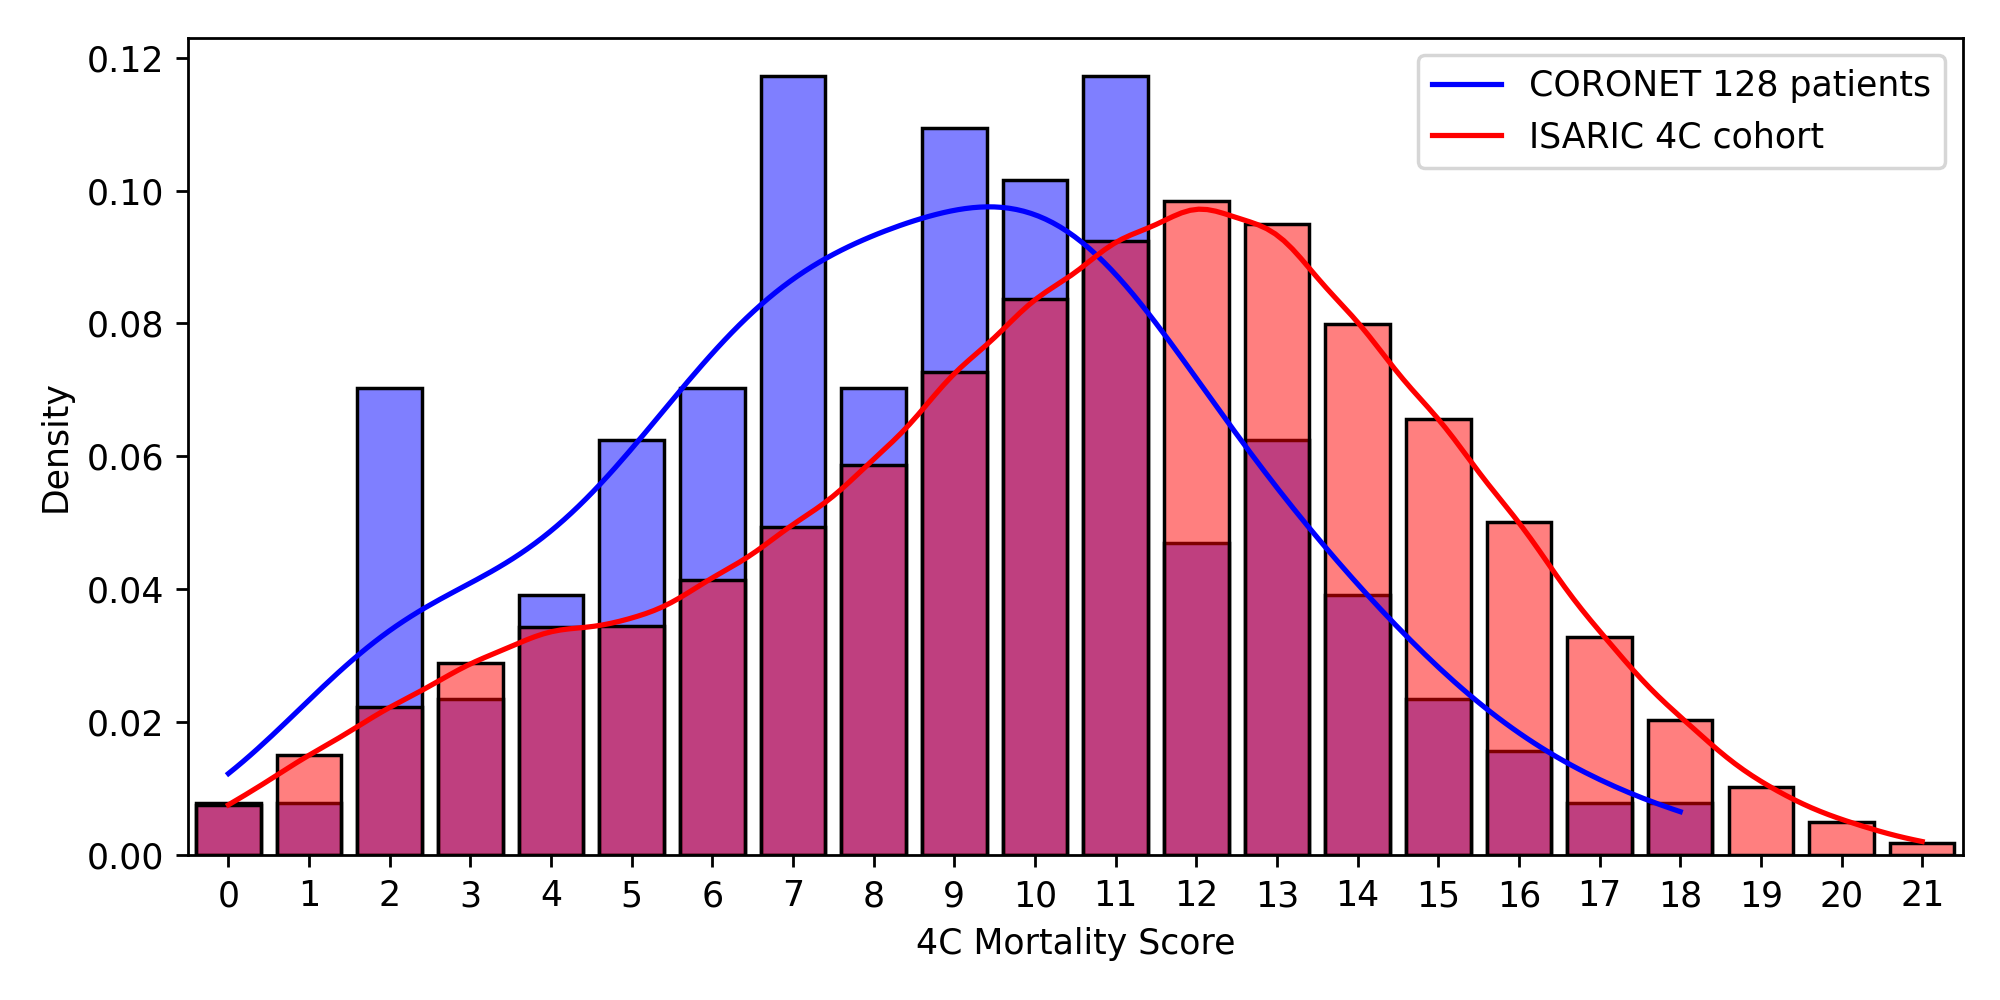

## B. Percentage mortality of cancer patients vs. ISARIC cohort across 4C scores. Only deaths due to COVID are considered.

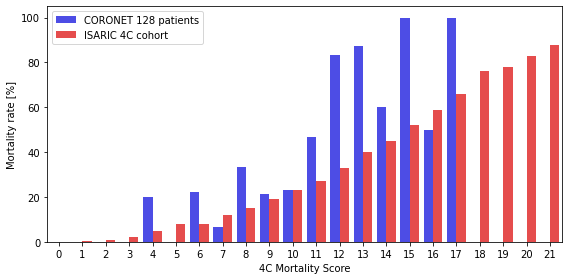

In [23]:
temp = pd.concat((mortality, mortality_isaric))

fig,ax=plt.subplots(figsize=(8,4))
#ax=axs[0]
g= sns.barplot(data=temp, x='4C', y='mortality_rate', hue='dataset', palette = ['blue','red'],ax=ax, alpha=0.8)
#g=sns.barplot(data=mortality_isaric, x='4C', y='mortality_rate', palette=  ['red'],ax=ax, alpha=0.5, label='sss')

leg=g.axes.get_legend()
g.legend_.set_title('')
# replace labels
new_labels = ['CORONET 128 patients', 'ISARIC 4C cohort']
for t, l in zip(leg.texts, new_labels): t.set_text(l)
    
#ax.legend(title='Cohort', labels=['Coronet 128 patients', 'Isaric 22361 patients'])
ax.set_xticks(np.arange(0,22,1));
ax.set_xticklabels(np.arange(0,22,1));
ax.set_xlim([-0.5,21.5])
ax.set_ylabel('Mortality rate [%]')
ax.set_xlabel('4C Mortality Score')
#ax.set_title('128 patients with cancer')
plt.tight_layout()
plt.savefig(r'...\mortality_rate.png', dpi=250)
plt.savefig(r'...\mortality_rate.svg', format="svg")

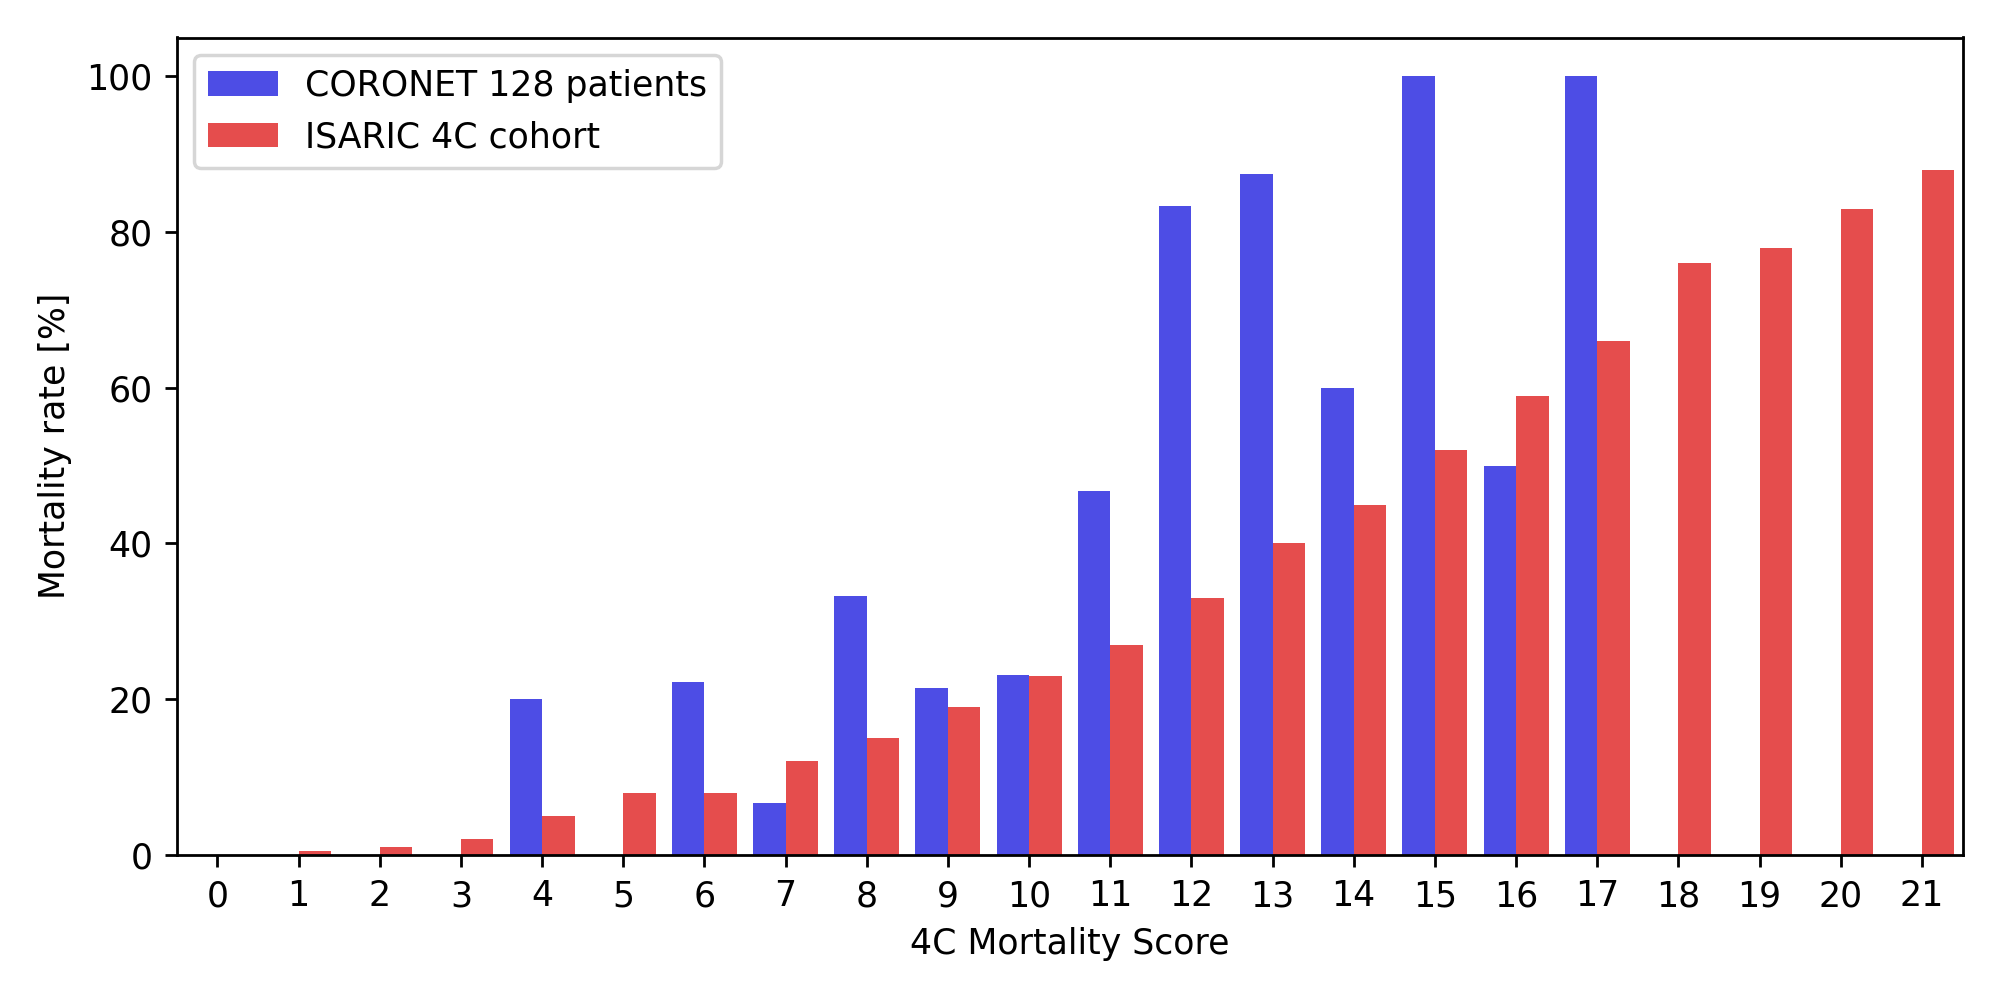

# Figure 3. CORONET score and outcome in cancer patients presenting with COVID-19 to each hospital in the cohort

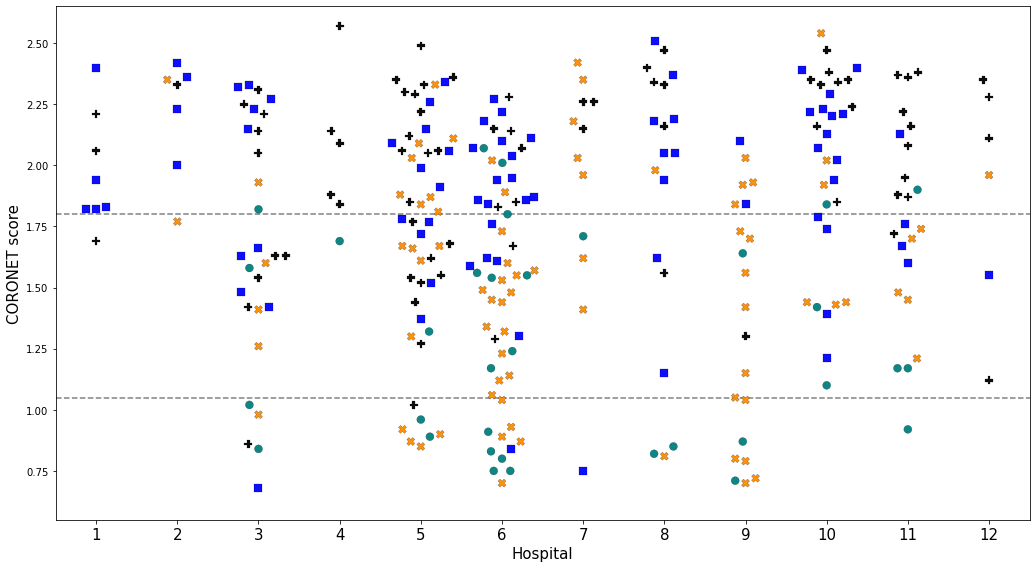

In [54]:
df_279_temp # data with coronet score for 279 patients derived from LOOCV

fig,ax=plt.subplots(figsize=(14.5,8))
a = ax.scatter([1,2],[3,4], marker='o')
b = ax.scatter([1,2],[3,4], marker='X')
c = ax.scatter([1,2],[3,4], marker='s')
d = ax.scatter([1,2],[3,4], marker='P')
o, = a.get_paths()
X, = b.get_paths()
s, = c.get_paths()
P, = d.get_paths()
a.remove()
b.remove()
c.remove()
d.remove()

font_size = 15

g=sns.swarmplot(x='Hospital', y = 'CORONET_score', hue='Outcome_covid_only',
                palette=["teal", 'darkorange','blue','black'],
                 edgecolor='gray', linewidth=0.2, alpha=0.95,
                 data=df_279_temp.sort_values('Hospital'),ax=ax,size=8)

collections = ax.collections
unique_colors = np.unique(collections[3].get_facecolors(), axis=0)[[3,2,1,0]]
markers = [o, X,s, P]  # this array must be at least as large as the number of unique colors
markers = [X,o,s,P]
for collection in collections:
    paths = []
    for current_color in collection.get_facecolors():
        for possible_marker,possible_color in zip(markers, unique_colors):
            if np.array_equal(current_color,possible_color):
                paths.append(possible_marker)
                break
    collection.set_paths(paths)

g.legend_.remove()
ax.set_ylim([0.55,2.65])
ax.axhline(1.05,  linestyle='--',color='gray',zorder=2)
ax.axhline(1.8,  linestyle='--',color='gray',zorder=2)
    
ax.set_xticklabels(np.arange(1,14), fontsize=font_size)
ax.set_ylabel('CORONET score', fontsize=font_size)
ax.set_xlabel('Hospital', fontsize=font_size)
plt.tight_layout()
plt.savefig(r'C:\Users\d07321ow\Google Drive\Cytokine\COVID19\Cancer_calculator\CORONET_paper\plots\coronet_vs_hospital.png', dpi=250)    
plt.savefig(r'C:\Users\d07321ow\Google Drive\Cytokine\COVID19\Cancer_calculator\CORONET_paper\plots\coronet_vs_hospital.svg', format='svg')    

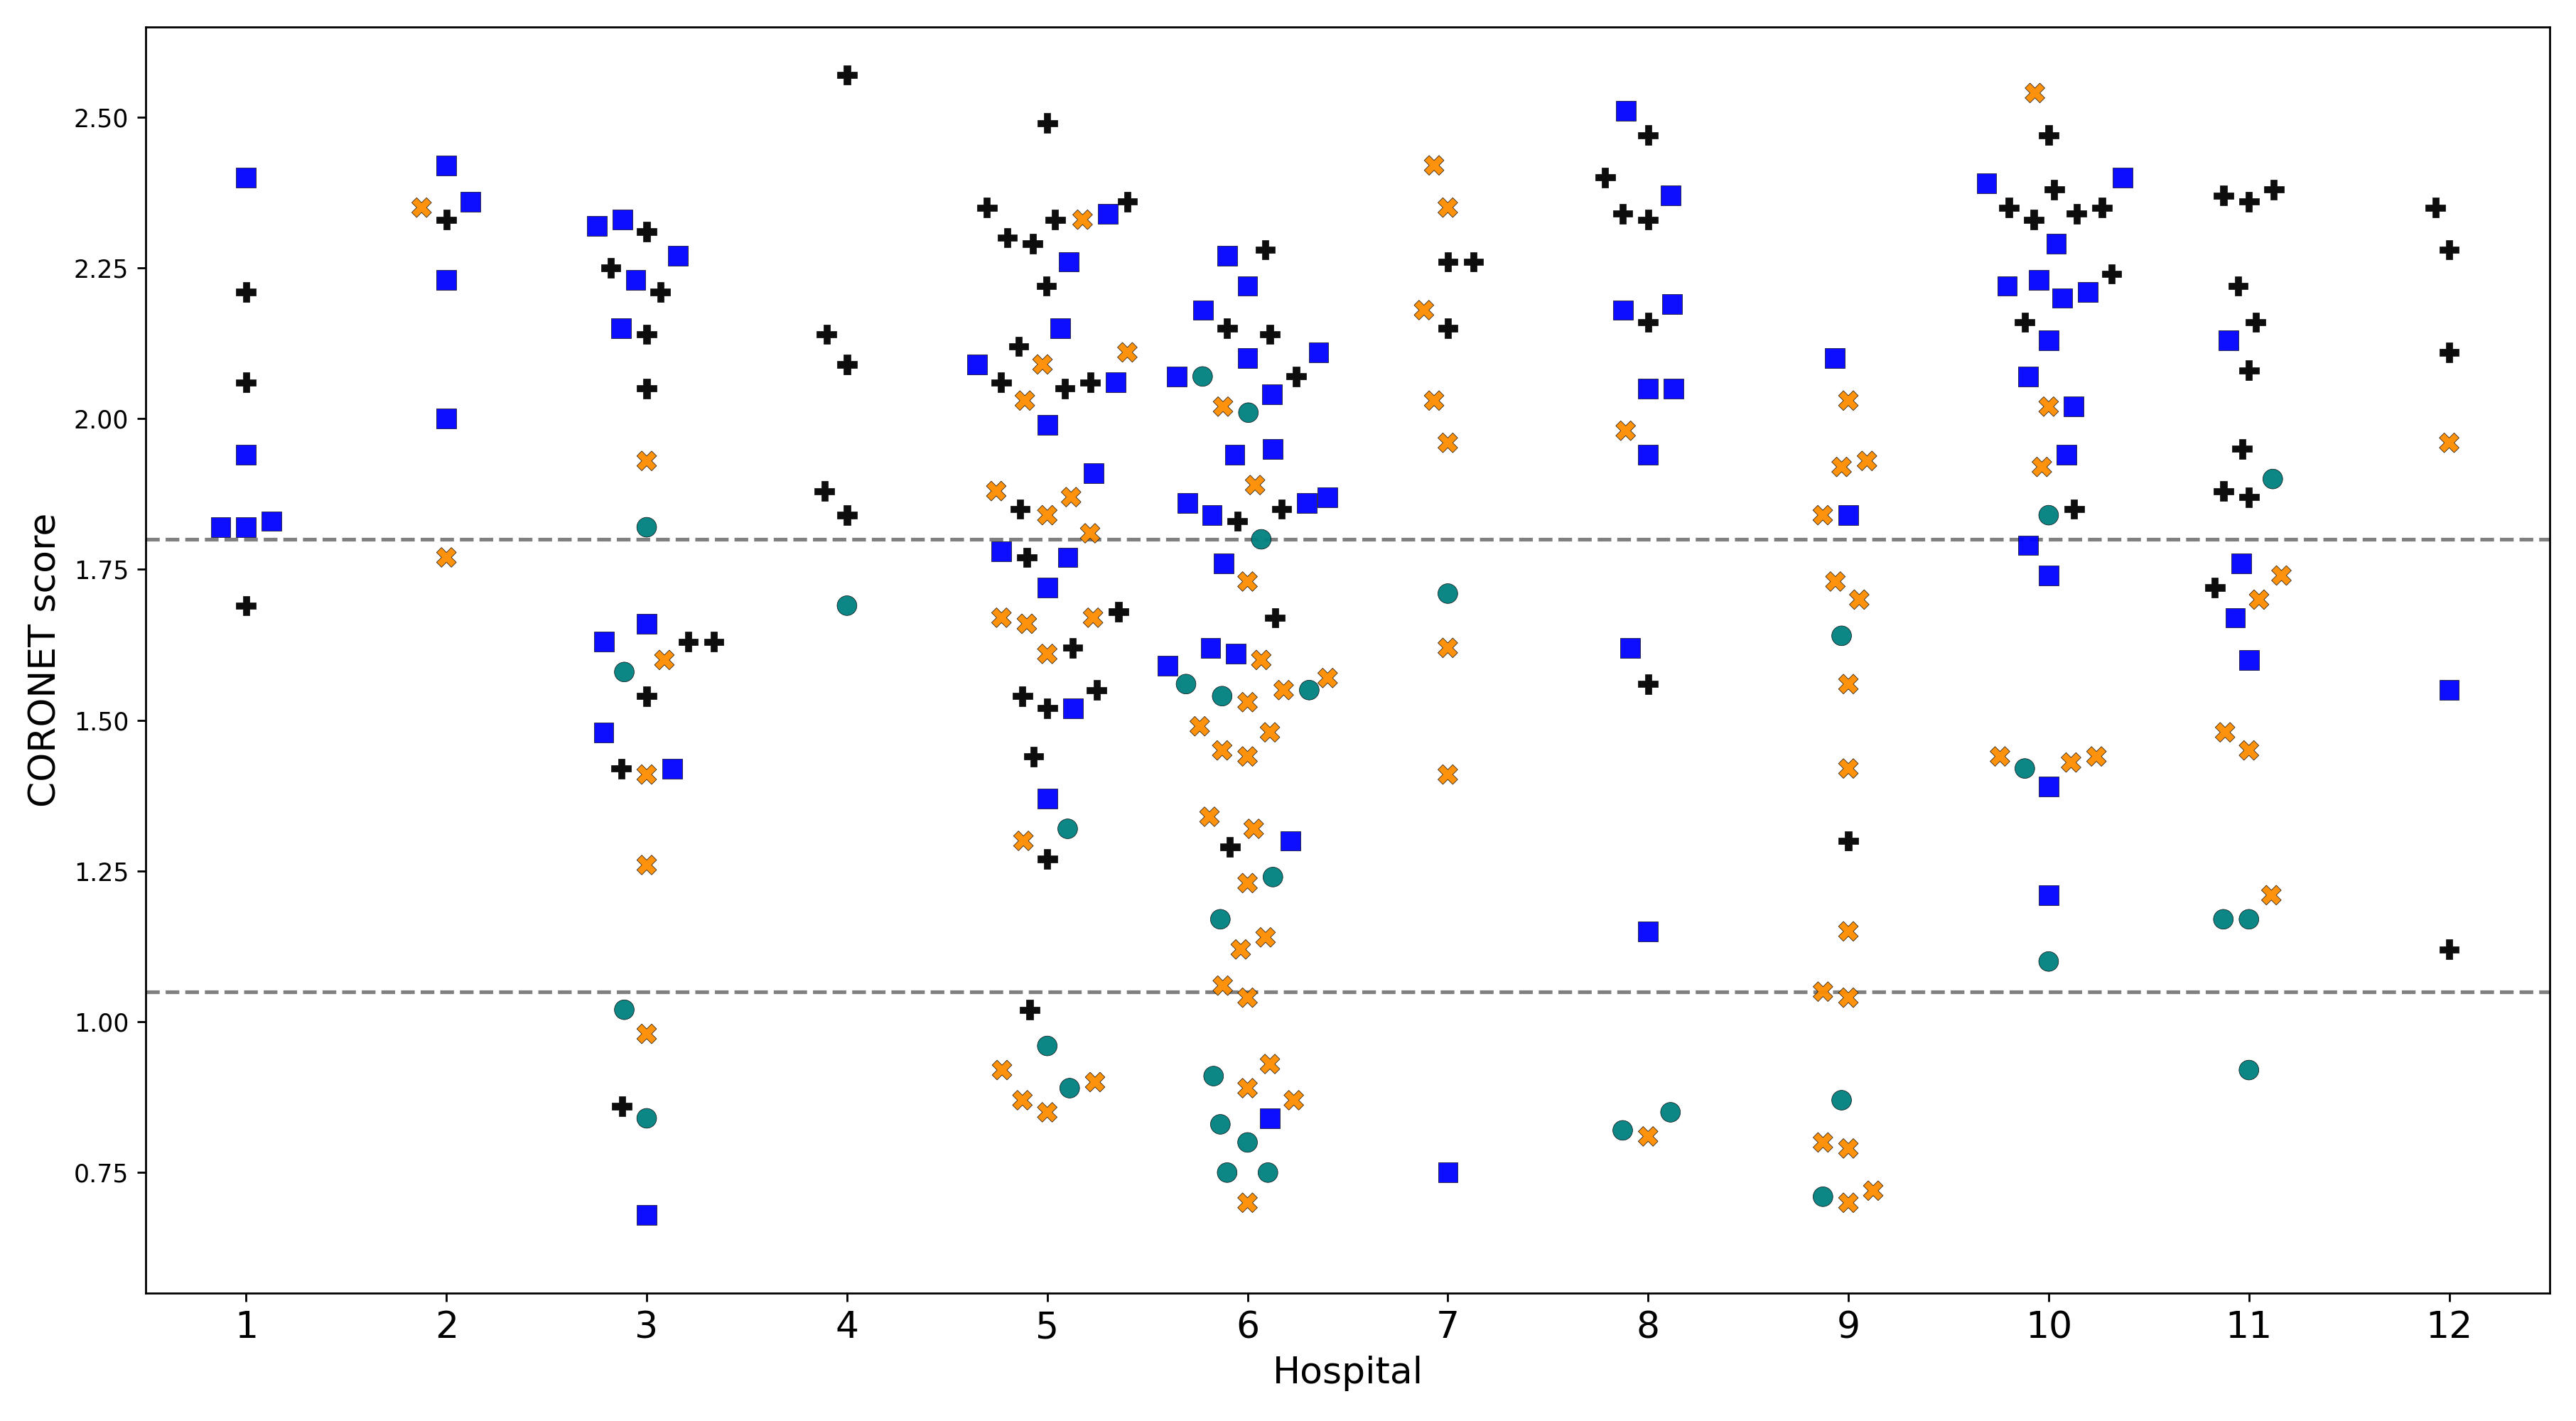

# Supplementary Figure 5. Comparison of CORONET admission and severe condition thresholds with ISARIC 4C “Rule in mortality” threshold in a cancer patient population


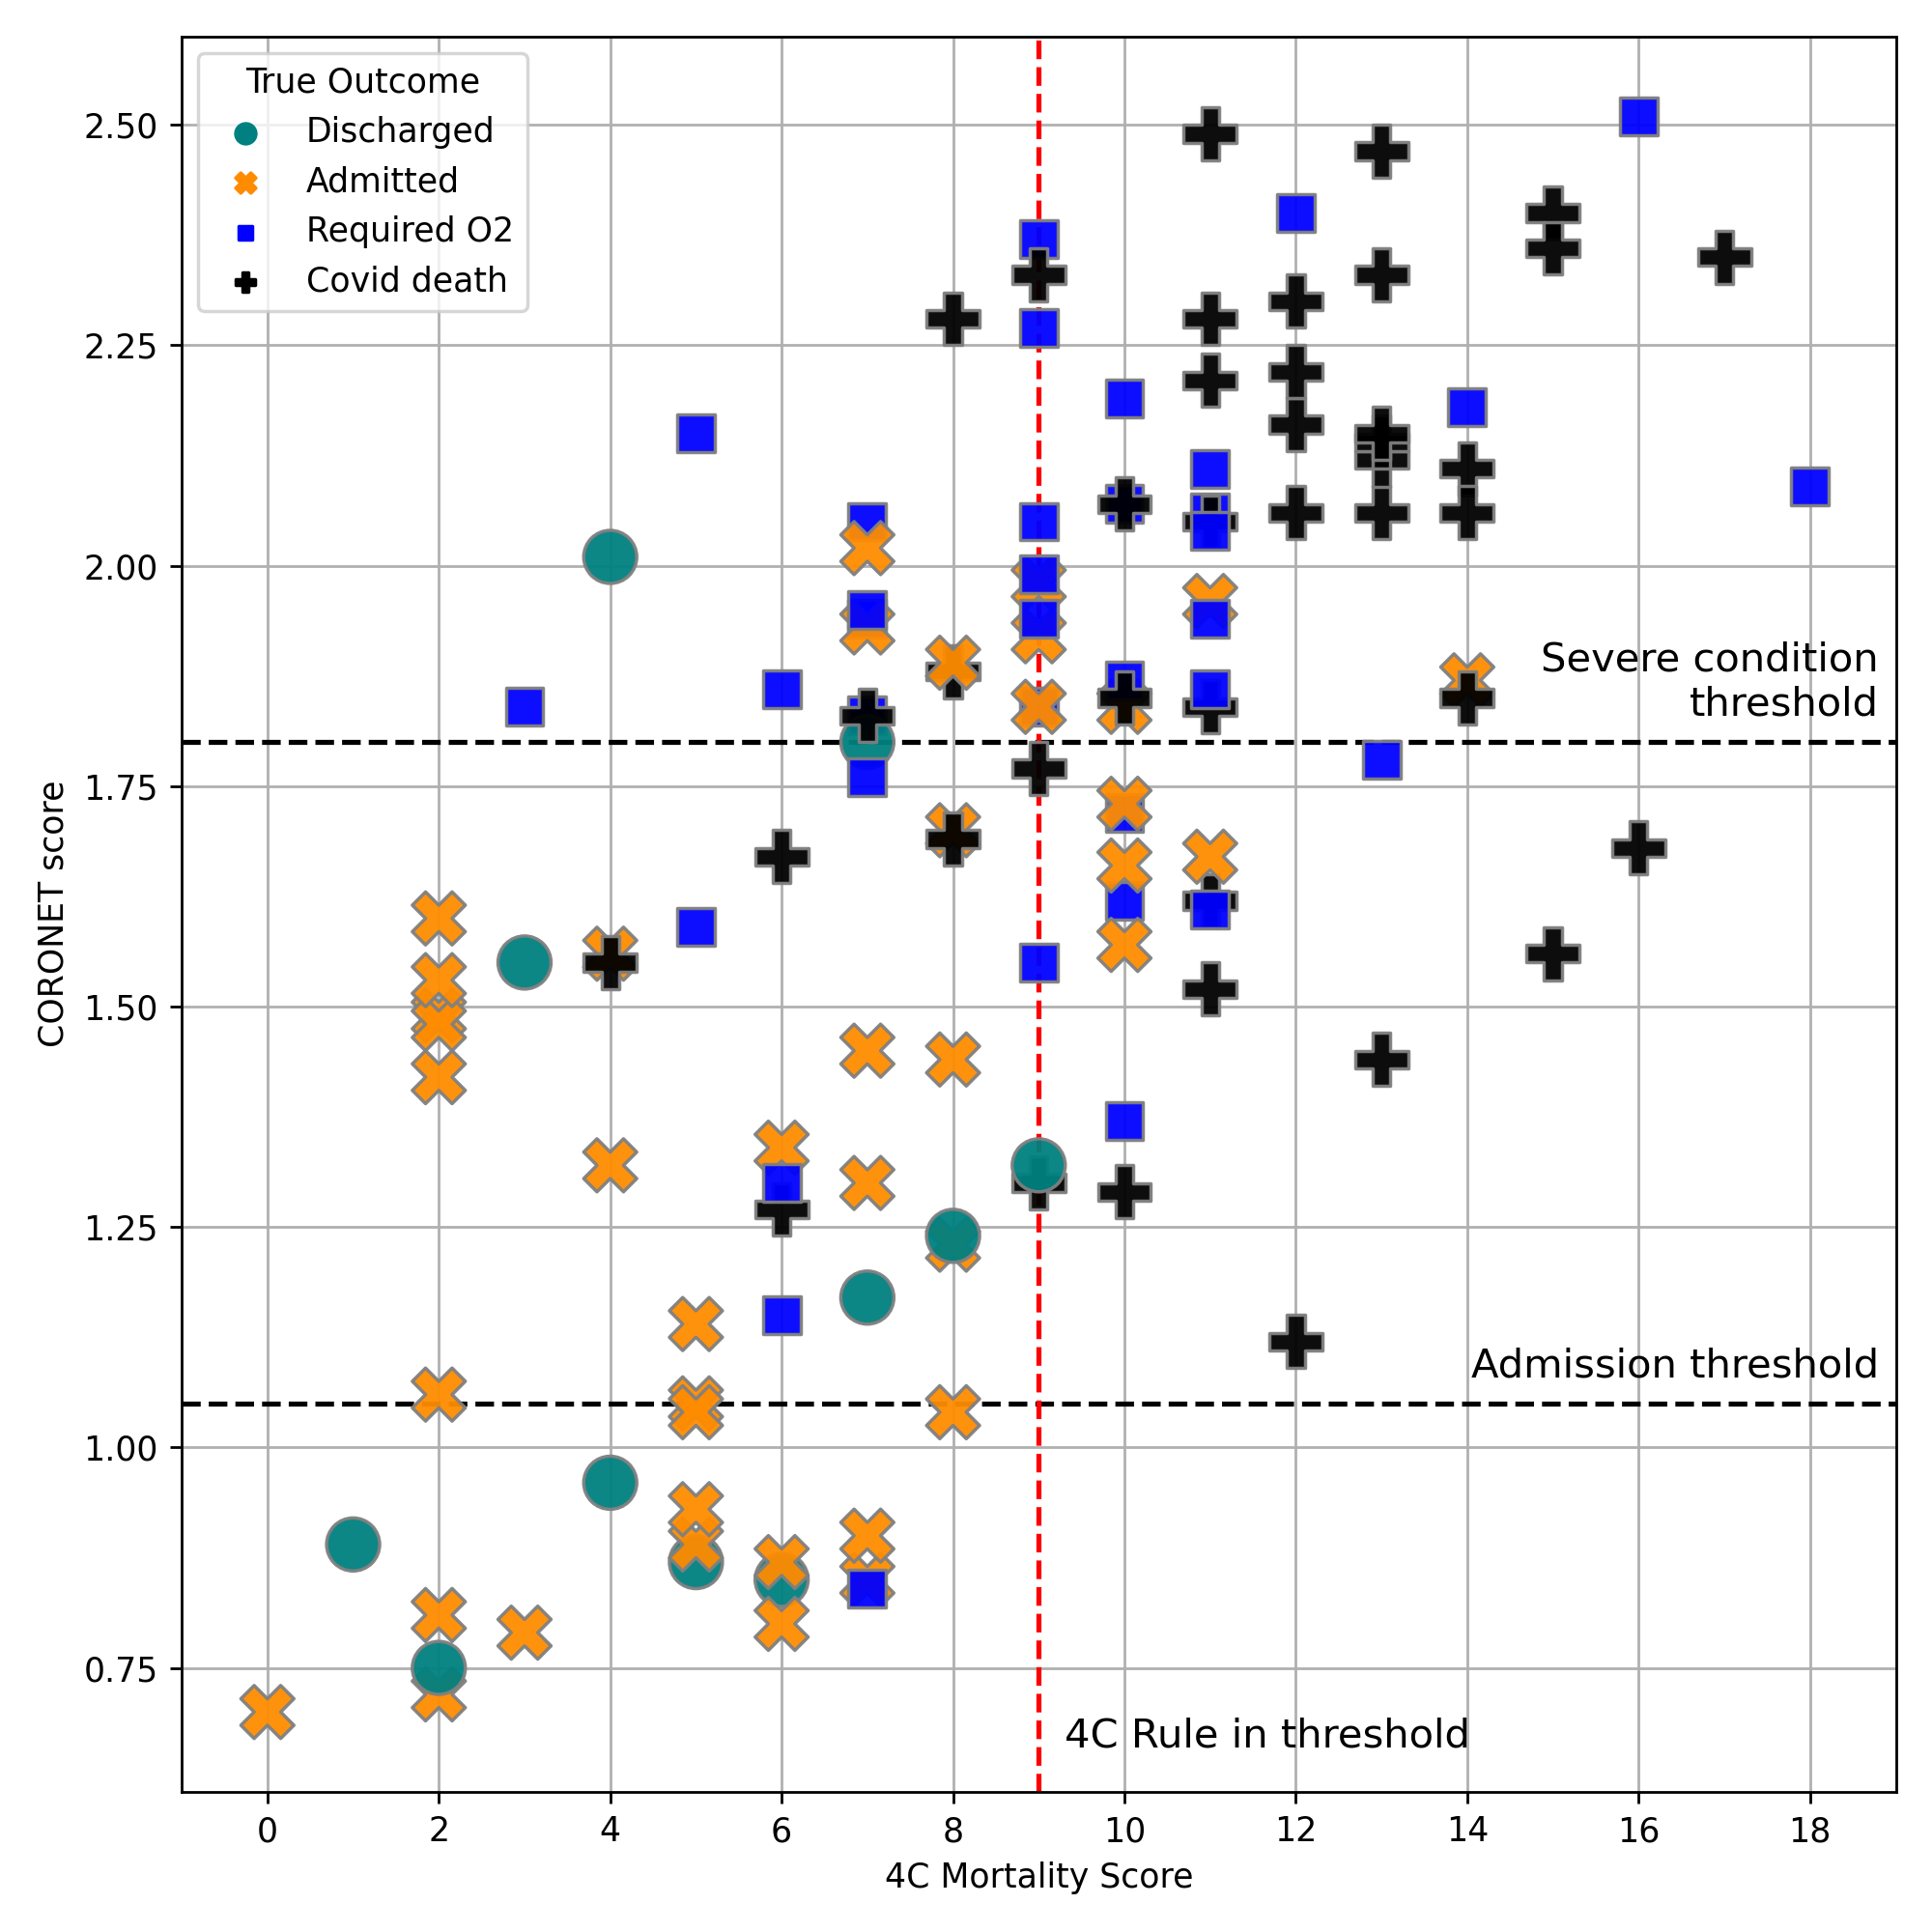